<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module4-clustering/Copy_of_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the TMDB 5000 dataset from Kaggle to try and cluster similar movies. 

It may be helpful to use PCA to reduce the dimensions of your data first - but then again maybe not. I dunno, you're the data scientist, you tell me. 🤪 

I'll let you download the dataset and get it into your notebook in the way that works best for you:

<https://www.kaggle.com/tmdb/tmdb-movie-metadata/version/2>

There are a few weird data cleaning steps that you'll need to do that I don't want you to get stuck on or spend a lot of time on so I'll try and help you out a little bit. 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/tmdb_5000_movies.csv")
print(df.shape)

df_nums = df.select_dtypes(include=['float64', 'int64'])
print(df_nums.shape)

# lazily fill NaNs with zeros
df_numeric = df_nums.fillna(value=0, axis=1)

df_numeric.head()

(4803, 20)
(4803, 7)


,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124


In [32]:
pca = PCA(n_components=3)

pca.fit(df_numeric)

df_pca_3 = pca.transform(df_numeric)

df_pca_3.shape

(4803, 3)

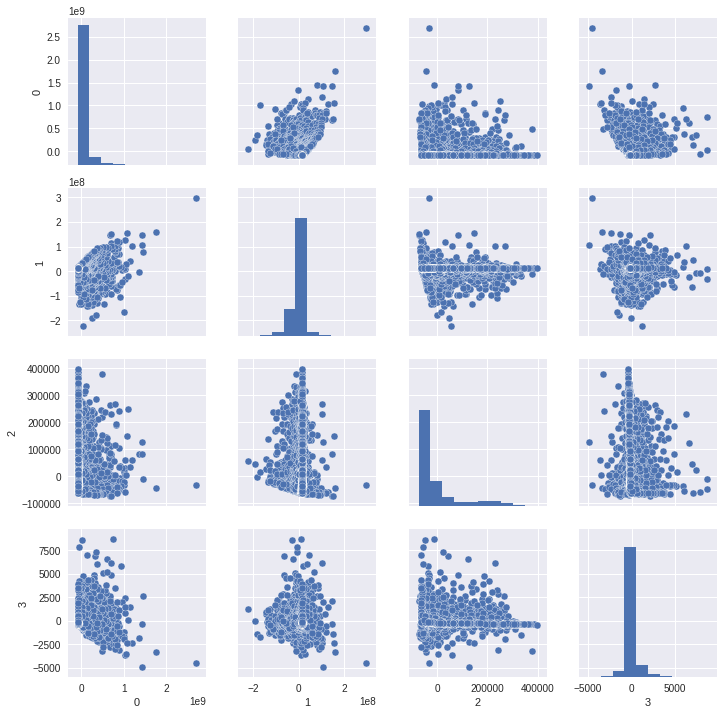

In [44]:
def pca_n(n, df=df_numeric):
  assert n <= df.shape[1]
  pca = PCA(n_components=n)
  pca.fit(df)
  return pd.DataFrame(pca.transform(df))

def pairplot(n, df=df_numeric): 
  return sns.pairplot(pca_n(n, df))

pairplot(4);


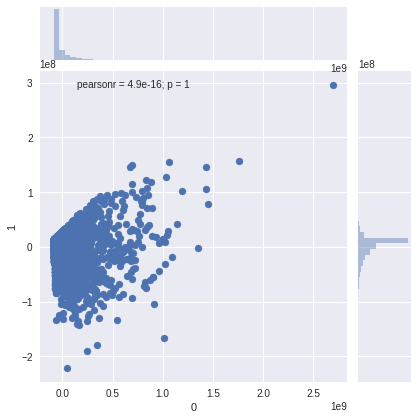

In [60]:
pca_n(2).head()

sns.jointplot(x=pca_n(2)[0], y=pca_n(2)[1]); 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


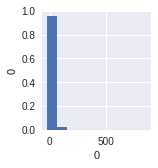

In [77]:

def pca_onefeat(feat, df=df_numeric): 
  pca = PCA()
  dat = df[feat].reshape(-1,1)
  pca.fit(dat)
  return pd.DataFrame(pca.transform(dat))

popularity_pca = pca_onefeat('popularity')

#sns.jointplot(popularity_pca[0], popularity_pca[1])

#popularity_pca.head()

sns.pairplot(popularity_pca)

# You take it from here!

See what you can come up with. You have all the know-how! 

,popularity,budget,runtime
0,150.437577,237000000,162.0
1,139.082615,300000000,169.0
2,107.376788,245000000,148.0
3,112.312950,250000000,165.0
4,43.926995,260000000,132.0


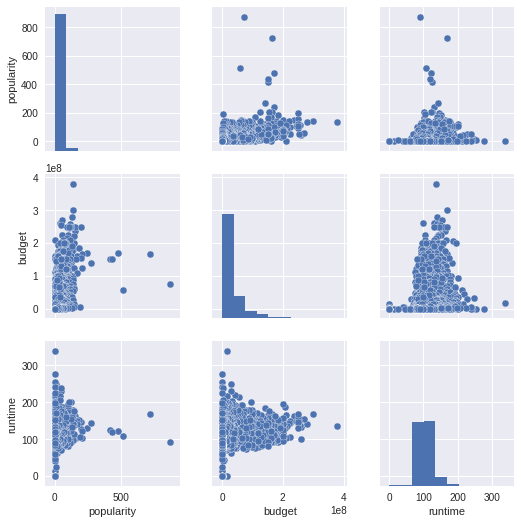

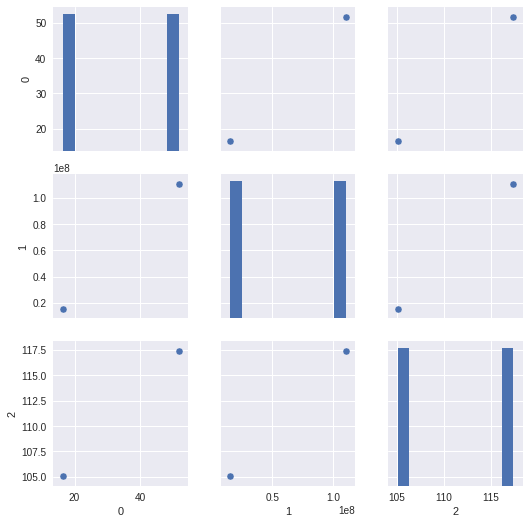

In [55]:
# I want to cluster over popularity, budget, and runtime 
X = df_numeric[['popularity', 'budget', 'runtime']]

twomeans_X = KMeans(n_clusters=2, random_state=0).fit(X)

centroids = pd.DataFrame(twomeans_X.cluster_centers_)

sns.pairplot(X);

sns.pairplot(pd.DataFrame(twomeans_X.cluster_centers_))

centroids.head()

X.head()

# Stretch Goal:

If you look at the original dataset you'll notice that I threw away some potentially useful columns. See if there are any that you could clean more effectively and turn into a numeric representation (probably some kind of one-hot-encoding of categorical variables) to assist your clustering. There's a lot more work here than the hours we have today however, so don't kill yourself trying to incorporate every single column from the original dataset, just take it one column at a time.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.